In [ ]:
%pip install scikit-learn
%pip install xgboost

In [6]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# โหลดข้อมูล
data = pd.read_csv("spotify_youtube_data.csv")

# เลือกคุณลักษณะ
features = ['streams', 'danceability%', 'positiveness%', 'energy%', 
            'acousticness%', 'views', 'likes']
target = 'peak_rank'

X = data[features].fillna(0)
y = data[target]

# แบ่งข้อมูล train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# โมเดล
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

results = {}

# ฝึกและทดสอบโมเดล
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

# แสดงผลลัพธ์
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics}")


Linear Regression: {'MAE': 45.09886762970237, 'RMSE': 53.19455125525224, 'R2': 0.18278575315863277}
Random Forest: {'MAE': 31.1727633851468, 'RMSE': 39.76155377216176, 'R2': 0.5434079722353815}
XGBoost: {'MAE': 32.42412501197816, 'RMSE': 41.620307908124765, 'R2': 0.499721075251245}


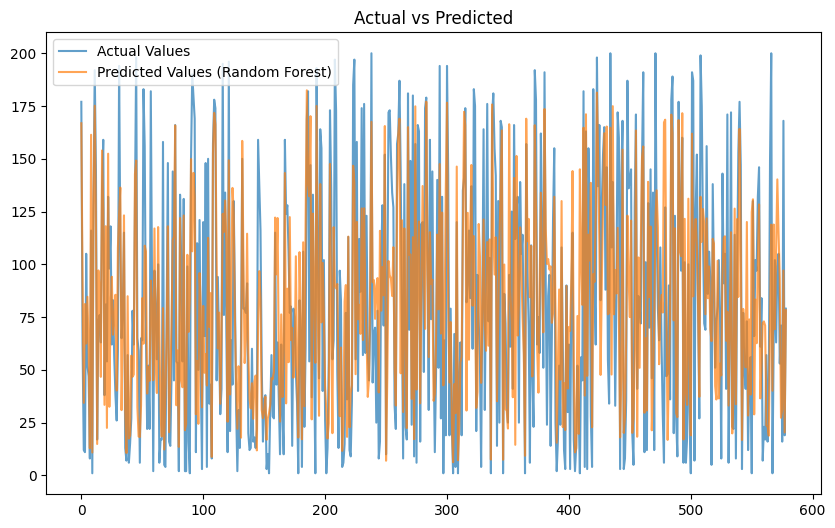

In [7]:
# กราฟแสดงความสัมพันธ์ระหว่างค่าจริงและค่าคาดการณ์  
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', alpha=0.7)
plt.plot(models["Random Forest"].predict(X_test), label='Predicted Values (Random Forest)', alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted")
plt.show()

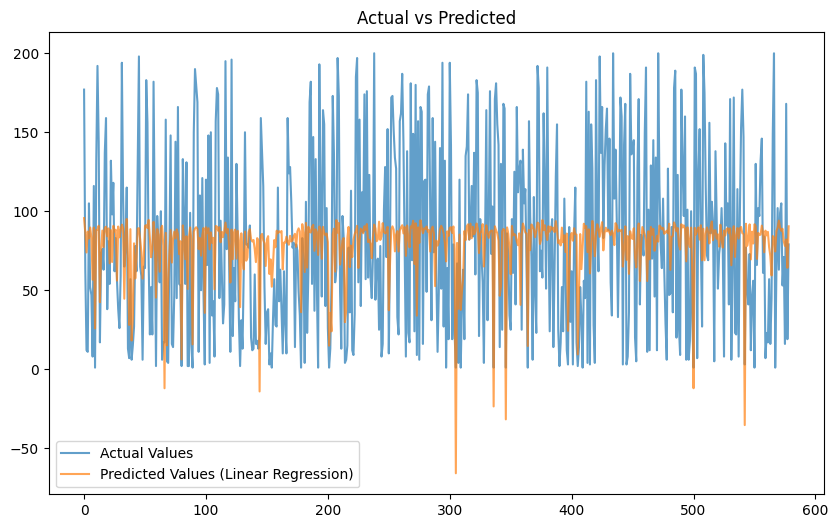

In [8]:
# กราฟแสดงความสัมพันธ์ระหว่างค่าจริงและค่าคาดการณ์  
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', alpha=0.7)
plt.plot(models["Linear Regression"].predict(X_test), label='Predicted Values (Linear Regression)', alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted")
plt.show()

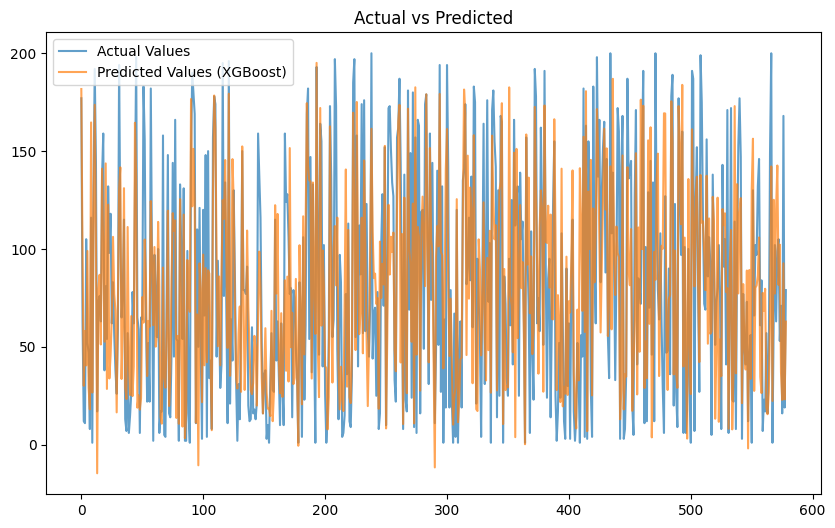

In [9]:
# กราฟแสดงความสัมพันธ์ระหว่างค่าจริงและค่าคาดการณ์  
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', alpha=0.7)
plt.plot(models["XGBoost"].predict(X_test), label='Predicted Values (XGBoost)', alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted")
plt.show()